**Context:**

Can you differentiate a weed from a crop seedling? 

The ability to do so effectively can mean better crop yields and better stewardship of the environment. The Aarhus University Signal Processing group, in collaboration with University of Southern Denmark, has recently released a dataset containing images of unique plants belonging to 12 species at several growth stages.

**Data Description:**

You are provided with a  dataset  of  images of  plant seedlings at various stages of  grown.  Each image has a filename that is its unique id. The dataset comprises 12 plant species. The goal of the project is to create a classifier capable of determining a plant's species from a photo.

In [1]:
# Import necessary modules.
import warnings
warnings.filterwarnings('ignore')

import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder

from tensorflow.keras import datasets, models, layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical



**Import the libraries, load dataset, print shape of data, visualize the images in dataset**

In [2]:
#Reading in data
imgdata = np.load('images.npy')
labels = pd.read_csv('Labels.csv')

In [3]:
imgdata.shape

(4750, 128, 128, 3)

In [4]:
labels.shape

(4750, 1)

In [5]:
labels.head()

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill


In [6]:
#Assigning data to variables to be used later
X = imgdata
y = labels.Label

In [7]:
y.value_counts()

Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Common wheat                 221
Maize                        221
Name: Label, dtype: int64

Text(0.5, 1.0, 'Small-flowered Cranesbill')

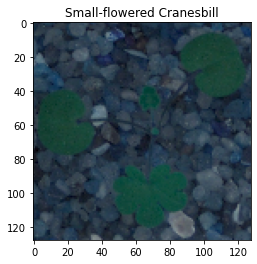

In [8]:
#Visualizing the image 1
i=1
img = X[i]
plt.imshow(img, cmap='gray')
plt.title(y[i])




Text(0.5, 1.0, 'Small-flowered Cranesbill')

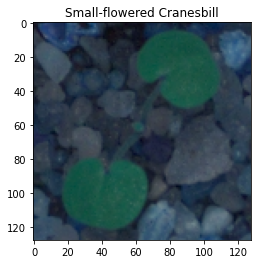

In [9]:
#Visualizing the image 5
i=5
img = X[i]
plt.imshow(img, cmap='gray')
plt.title(y[i])
    





Text(0.5, 1.0, 'Small-flowered Cranesbill')

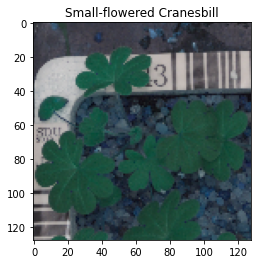

In [11]:
#Visualizing the image 10
i=3
img = X[3]
plt.imshow(img, cmap='gray')
plt.title(y[i])    

**Data Pre-processing: (15 Marks)**

In [12]:
x_copy = X
y_copy = y
print(len(x_copy)) # 
print(x_copy.shape) #
x_copy[1]

4750
(4750, 128, 128, 3)


array([[[ 30,  47,  63],
        [ 30,  50,  60],
        [ 34,  47,  63],
        ...,
        [ 48,  59,  74],
        [ 42,  54,  69],
        [ 44,  56,  70]],

       [[ 30,  49,  67],
        [ 26,  47,  60],
        [ 30,  40,  61],
        ...,
        [ 50,  64,  76],
        [ 52,  67,  78],
        [ 45,  56,  72]],

       [[ 23,  46,  65],
        [ 27,  48,  64],
        [ 25,  40,  59],
        ...,
        [ 39,  59,  81],
        [ 47,  62,  79],
        [ 42,  54,  69]],

       ...,

       [[ 32,  54,  72],
        [ 58,  82,  95],
        [ 72,  96, 109],
        ...,
        [ 60,  80,  99],
        [ 50,  72,  92],
        [ 45,  64,  84]],

       [[ 31,  51,  67],
        [ 25,  50,  64],
        [ 38,  64,  80],
        ...,
        [ 63,  83, 101],
        [ 57,  78,  96],
        [ 50,  69,  89]],

       [[ 18,  32,  56],
        [ 16,  27,  50],
        [ 34,  49,  71],
        ...,
        [ 59,  84, 101],
        [ 55,  80,  97],
        [ 39,  59,  82]]

**Guassian Blur**

In [13]:
for idx, img in enumerate(x_copy):
  x_copy[idx] = cv2.GaussianBlur(img, (5, 5), 0)

Text(0.5, 1.0, 'Small-flowered Cranesbill')

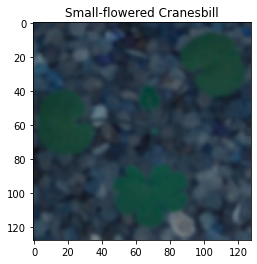

In [14]:
# Plot the de-noised image generated by applying Gaussian blur.
plt.imshow(x_copy[1], cmap='gray')
plt.title(y_copy[1])



**Normalization**

In [15]:
# Normalize the data
x_copy = x_copy.astype('float32') / 255.0
x_copy[1]

array([[[0.11372549, 0.18431373, 0.24313726],
        [0.11372549, 0.18431373, 0.24313726],
        [0.12156863, 0.1764706 , 0.24313726],
        ...,
        [0.18039216, 0.23137255, 0.28627452],
        [0.18039216, 0.23529412, 0.2901961 ],
        [0.18039216, 0.23137255, 0.28627452]],

       [[0.10980392, 0.18431373, 0.24705882],
        [0.10980392, 0.18039216, 0.24313726],
        [0.12156863, 0.18039216, 0.24705882],
        ...,
        [0.17254902, 0.23137255, 0.29411766],
        [0.1764706 , 0.23529412, 0.29411766],
        [0.1764706 , 0.23137255, 0.29411766]],

       [[0.10196079, 0.18431373, 0.24705882],
        [0.10588235, 0.18431373, 0.24705882],
        [0.12156863, 0.1882353 , 0.25490198],
        ...,
        [0.14901961, 0.23529412, 0.32156864],
        [0.15686275, 0.23137255, 0.31764707],
        [0.16078432, 0.23137255, 0.30980393]],

       ...,

       [[0.16470589, 0.24705882, 0.30980393],
        [0.1764706 , 0.2627451 , 0.3254902 ],
        [0.19215687, 0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


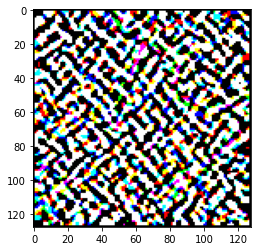

In [16]:
sobel = cv2.Sobel(img, cv2.CV_64F, 1, 1, ksize=5)
plt.imshow(sobel)



**Make data compatible: (10 Marks)**

In [17]:
# Convert labels to one hot vectors.

from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y_copy = enc.fit_transform(y_copy)

print(y_copy.shape)

(4750, 12)


In [18]:
y_copy[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [19]:
#Data splitting - train, test, validate
train_ratio = 0.70
validation_ratio = 0.15
test_ratio = 0.15

from sklearn.model_selection import train_test_split
# train is now 70% of the entire data set#
x_train, x_test, y_train, y_test = train_test_split(x_copy, y_copy, test_size=1 - train_ratio)

# test is now 15% of the initial data set
# validation is now 15% of the initial data set
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

print(len(x_train))
print(len(y_test))
print(len(x_val))

3324
713
713


In [20]:
#Printing label for y_train[0]
label = enc.inverse_transform(y_train)
print(label[0])

Scentless Mayweed


In [21]:
x_test[1]

array([[[0.12941177, 0.16862746, 0.23529412],
        [0.12941177, 0.17254902, 0.24313726],
        [0.13333334, 0.1882353 , 0.25882354],
        ...,
        [0.22352941, 0.28235295, 0.34117648],
        [0.22352941, 0.2784314 , 0.34509805],
        [0.22745098, 0.28235295, 0.34509805]],

       [[0.13725491, 0.1764706 , 0.24313726],
        [0.13333334, 0.18039216, 0.24705882],
        [0.13725491, 0.19215687, 0.2627451 ],
        ...,
        [0.22352941, 0.2784314 , 0.34117648],
        [0.22352941, 0.2784314 , 0.34509805],
        [0.22745098, 0.2784314 , 0.34509805]],

       [[0.13725491, 0.18039216, 0.24705882],
        [0.13725491, 0.18431373, 0.2509804 ],
        [0.13333334, 0.19215687, 0.2627451 ],
        ...,
        [0.22745098, 0.2784314 , 0.34117648],
        [0.22352941, 0.2784314 , 0.34509805],
        [0.22352941, 0.27450982, 0.34509805]],

       ...,

       [[0.18039216, 0.26666668, 0.32156864],
        [0.18039216, 0.26666668, 0.32156864],
        [0.18431373, 0

In [22]:
x_train.shape

(3324, 128, 128, 3)

In [23]:
x_val.shape

(713, 128, 128, 3)

In [24]:
x_test.shape

(713, 128, 128, 3)

In [25]:
y_test.shape

(713, 12)

**The shapes are correct**

**Building CNN**

In [26]:
# Setting some variables for the CNN to build on
num_classes = 12
epochs = 200
num_predictions = 20

In [27]:
# Set the CNN model

#We won't be setting batch size
batch_size = None

model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), padding='same', activation="relu", input_shape=x_train.shape[1:]))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (5, 5), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.GlobalMaxPooling2D())
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(12, activation="softmax"))


model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      2432      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        51264     
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0

In [28]:
# Using Adam optimizer
opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

In [29]:
# Using Categorical Crossentropy
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [30]:
# Network structure is summarized which confirms our design were implemented correctly.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      2432      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        51264     
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0

In [31]:
#Adding Early stopping callback to the fit function is going to stop the training,
#if the val_loss is not going to change even '0.001' for more than 20 continous epochs
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=40)

#Adding Model Checkpoint callback to the fit function is going to save the weights whenever val_loss achieves a new low value. 
#Hence saving the best weights occurred during training

model_checkpoint =  ModelCheckpoint('cifar_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.tf',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           period=1)



In [32]:
#The datasets are in their correct shape, this step was here as a final check.

#x_train = x_train.reshape(x_train.shape[0], 128, 128, 3)
#x_test = x_test.reshape(x_test.shape[0], 128, 128, 3)
#x_val = x_test.reshape(x_val.shape[0], 128, 128, 3)
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)


(3324, 128, 128, 3)
(713, 128, 128, 3)
(713, 128, 128, 3)


Epoch 1/200
104/104 [==============================] - 37s 350ms/step - loss: 4.0158 - accuracy: 0.1856 - val_loss: 2.6500 - val_accuracy: 0.1459

Epoch 00001: val_loss improved from inf to 2.64996, saving model to cifar_cnn_checkpoint_01_loss2.6500.tf
Epoch 2/200
104/104 [==============================] - 37s 351ms/step - loss: 2.0630 - accuracy: 0.2945 - val_loss: 2.8242 - val_accuracy: 0.1473

Epoch 00002: val_loss did not improve from 2.64996
Epoch 3/200
104/104 [==============================] - 37s 355ms/step - loss: 1.8011 - accuracy: 0.3667 - val_loss: 2.8625 - val_accuracy: 0.1473

Epoch 00003: val_loss did not improve from 2.64996
Epoch 4/200
104/104 [==============================] - 37s 354ms/step - loss: 1.6597 - accuracy: 0.4305 - val_loss: 3.1351 - val_accuracy: 0.1473

Epoch 00004: val_loss did not improve from 2.64996
Epoch 5/200
104/104 [==============================] - 38s 370ms/step - loss: 1.5459 - accuracy: 0.4603 - val_loss: 1.9826 - val_accuracy: 0.2777

Epoch 

104/104 [==============================] - 38s 365ms/step - loss: 0.6324 - accuracy: 0.7798 - val_loss: 0.5836 - val_accuracy: 0.8401

Epoch 00038: val_loss improved from 0.67122 to 0.58355, saving model to cifar_cnn_checkpoint_38_loss0.5836.tf
Epoch 39/200
104/104 [==============================] - 36s 351ms/step - loss: 0.6369 - accuracy: 0.7825 - val_loss: 0.5817 - val_accuracy: 0.8107

Epoch 00039: val_loss improved from 0.58355 to 0.58175, saving model to cifar_cnn_checkpoint_39_loss0.5817.tf
Epoch 40/200
104/104 [==============================] - 37s 356ms/step - loss: 0.5799 - accuracy: 0.8039 - val_loss: 0.7046 - val_accuracy: 0.7672

Epoch 00040: val_loss did not improve from 0.58175
Epoch 41/200
104/104 [==============================] - 38s 363ms/step - loss: 0.6174 - accuracy: 0.7945 - val_loss: 0.7600 - val_accuracy: 0.7391

Epoch 00041: val_loss did not improve from 0.58175
Epoch 42/200
104/104 [==============================] - 38s 367ms/step - loss: 0.5935 - accuracy: 0

104/104 [==============================] - 40s 384ms/step - loss: 0.4035 - accuracy: 0.8622 - val_loss: 1.6294 - val_accuracy: 0.5498

Epoch 00078: val_loss did not improve from 0.35419
Epoch 79/200
104/104 [==============================] - 40s 382ms/step - loss: 0.3939 - accuracy: 0.8724 - val_loss: 0.4091 - val_accuracy: 0.8710

Epoch 00079: val_loss did not improve from 0.35419
Epoch 80/200
104/104 [==============================] - 39s 376ms/step - loss: 0.3857 - accuracy: 0.8685 - val_loss: 0.5591 - val_accuracy: 0.8036

Epoch 00080: val_loss did not improve from 0.35419
Epoch 81/200
104/104 [==============================] - 40s 388ms/step - loss: 0.4221 - accuracy: 0.8499 - val_loss: 0.4072 - val_accuracy: 0.8541

Epoch 00081: val_loss did not improve from 0.35419
Epoch 82/200
104/104 [==============================] - 40s 386ms/step - loss: 0.4051 - accuracy: 0.8652 - val_loss: 0.5102 - val_accuracy: 0.8485

Epoch 00082: val_loss did not improve from 0.35419
Epoch 83/200
104/1

104/104 [==============================] - 38s 368ms/step - loss: 0.2733 - accuracy: 0.9010 - val_loss: 0.3883 - val_accuracy: 0.8569

Epoch 00119: val_loss did not improve from 0.31706
Epoch 120/200
104/104 [==============================] - 39s 371ms/step - loss: 0.2887 - accuracy: 0.8998 - val_loss: 1.0477 - val_accuracy: 0.6858

Epoch 00120: val_loss did not improve from 0.31706
Epoch 121/200
104/104 [==============================] - 39s 374ms/step - loss: 0.2855 - accuracy: 0.8995 - val_loss: 0.4761 - val_accuracy: 0.8513

Epoch 00121: val_loss did not improve from 0.31706
Epoch 122/200
104/104 [==============================] - 38s 370ms/step - loss: 0.3190 - accuracy: 0.8986 - val_loss: 0.5302 - val_accuracy: 0.8233

Epoch 00122: val_loss did not improve from 0.31706
Epoch 123/200
104/104 [==============================] - 39s 370ms/step - loss: 0.2858 - accuracy: 0.9040 - val_loss: 0.7107 - val_accuracy: 0.7770

Epoch 00123: val_loss did not improve from 0.31706
Epoch 124/200


104/104 [==============================] - 39s 380ms/step - loss: 0.2440 - accuracy: 0.9146 - val_loss: 0.3073 - val_accuracy: 0.8934

Epoch 00159: val_loss did not improve from 0.27650
Epoch 160/200
104/104 [==============================] - 40s 384ms/step - loss: 0.2535 - accuracy: 0.9085 - val_loss: 1.0699 - val_accuracy: 0.6760

Epoch 00160: val_loss did not improve from 0.27650
Epoch 161/200
104/104 [==============================] - 39s 378ms/step - loss: 0.2373 - accuracy: 0.9179 - val_loss: 0.2917 - val_accuracy: 0.8864

Epoch 00161: val_loss did not improve from 0.27650
Epoch 162/200
104/104 [==============================] - 40s 384ms/step - loss: 0.2489 - accuracy: 0.9119 - val_loss: 0.4999 - val_accuracy: 0.8149

Epoch 00162: val_loss did not improve from 0.27650
Epoch 163/200
104/104 [==============================] - 40s 388ms/step - loss: 0.2763 - accuracy: 0.9106 - val_loss: 0.2972 - val_accuracy: 0.9046

Epoch 00163: val_loss did not improve from 0.27650
Epoch 164/200


104/104 [==============================] - 40s 386ms/step - loss: 0.1880 - accuracy: 0.9311 - val_loss: 0.4105 - val_accuracy: 0.8710

Epoch 00199: val_loss did not improve from 0.24903
Epoch 200/200
104/104 [==============================] - 40s 383ms/step - loss: 0.2112 - accuracy: 0.9299 - val_loss: 0.3166 - val_accuracy: 0.8892

Epoch 00200: val_loss did not improve from 0.24903


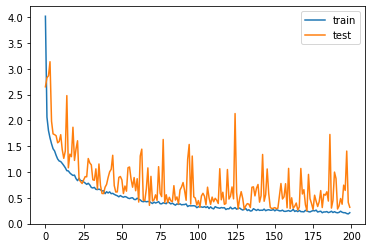

In [33]:
#Using val datasets for validation
history = model.fit(x_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_val, y_val),
                    shuffle=True,
                    verbose=1,
                    callbacks=[early_stopping,model_checkpoint])

# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()



**Observations:**
    
The model learned at a steady rate on the test set, as we see the loss decrease over time with no significant change.

In [34]:
# Score trained model on Test Dataset
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

23/23 [==============================] - 2s 67ms/step - loss: 0.3083 - accuracy: 0.9116
Test loss: 0.30832231044769287
Test accuracy: 0.9116409420967102


In [35]:
# Score trained model on Validation Dataset
scores = model.evaluate(x_val, y_val, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

23/23 [==============================] - 1s 64ms/step - loss: 0.3166 - accuracy: 0.8892
Test loss: 0.3166283965110779
Test accuracy: 0.8892005681991577


In [36]:
from sklearn.metrics import classification_report, confusion_matrix

In [37]:
print("=== Confusion Matrix ===")
y_pred=model.predict(x_test) 
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)


=== Confusion Matrix ===
[[10  0  0  0  1  0 13  0  3  0  0  0]
 [ 0 48  1  0  0  0  0  0  0  5  0  0]
 [ 0  0 44  0  0  1  0  0  2  1  0  0]
 [ 0  0  0 80  0  1  0  0  3  2  0  0]
 [ 1  0  0  0 29  2  3  0  0  0  0  0]
 [ 0  0  0  0  0 71  1  0  0  0  0  1]
 [ 2  0  0  0  0  0 96  0  2  0  0  0]
 [ 0  0  0  0  0  0  0 41  0  0  0  0]
 [ 0  0  0  2  0  0  2  0 78  3  0  0]
 [ 0  0  0  2  0  0  0  0  1 36  0  0]
 [ 0  0  0  0  0  1  0  0  0  0 74  0]
 [ 0  0  0  0  0  0  1  0  5  1  0 43]]


<AxesSubplot:>

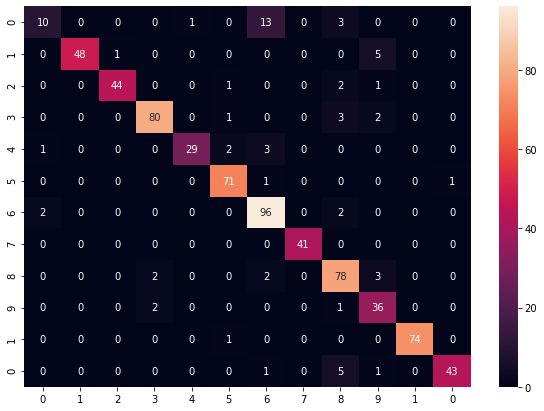

In [38]:
df_cm = pd.DataFrame(cm, index = [i for i in "012345678910"],
                     columns = [i for i in "012345678910"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='d')



There are two sets of images that appear to be very similar to one another, with the model struggling to tell them apart on a number of occassions.

In [39]:
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))





=== Classification Report ===
              precision    recall  f1-score   support

           0       0.77      0.37      0.50        27
           1       1.00      0.89      0.94        54
           2       0.98      0.92      0.95        48
           3       0.95      0.93      0.94        86
           4       0.97      0.83      0.89        35
           5       0.93      0.97      0.95        73
           6       0.83      0.96      0.89       100
           7       1.00      1.00      1.00        41
           8       0.83      0.92      0.87        85
           9       0.75      0.92      0.83        39
          10       1.00      0.99      0.99        75
          11       0.98      0.86      0.91        50

    accuracy                           0.91       713
   macro avg       0.92      0.88      0.89       713
weighted avg       0.92      0.91      0.91       713



**Performance Review**

The CNN performs well in classifying the images.

Based on the Classification Report as seen above, the CNN only struggles on identifying the images corresponding with label 0. The recall being a measly 0.37.

There are a number of possible reasons. The images could be of lower quality, there could be less in the training dataset, or simply they are too similiair to a different leaf sample.

However, that being said, the similarity in the results for the other image samples is high enough that with enough time and additional samples, the model will learn to classify the poorly performing labels better.

Overall, the model performed well.

High Precision and Recall scores are good.

The better the Recall, the less errors the model tends to make when positively identifying the leaves.

Converting the images to grayscale will not improve performance, given the low quality

**Visualizing Predictions**

Predicted label: 9
Predicted label: Shepherds Purse
Softmax Outputs: [[3.0566127e-07 3.8388988e-01 2.2654729e-03 9.6666167e-04 1.4570307e-05
  8.9605292e-06 7.3399501e-06 5.3723890e-04 1.2702479e-02 5.9876120e-01
  5.4252374e-05 7.9159241e-04]]
0.99999994


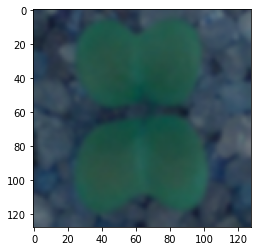

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x_test[2].reshape(128, 128, 3), cmap='gray')
y_pred = model.predict(x_test[2].reshape(1, 128, 128, 3))
print("Predicted label:", y_pred.argmax())
#Based on the predicted label number -
print("Predicted label: Shepherds Purse")
print("Softmax Outputs:", y_pred)
print(y_pred.sum())

Predicted label: 3
Predicted label: Small-flowered Cranesbill
Softmax Outputs: [[2.9555656e-07 2.1735207e-11 4.3493338e-04 9.9892300e-01 1.4072663e-06
  1.2875447e-04 9.8853816e-05 1.5214420e-06 1.5584166e-04 2.3813604e-04
  1.3031748e-05 4.1136054e-06]]
0.99999994


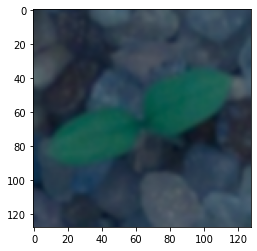

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x_test[3].reshape(128, 128, 3), cmap='gray')
y_pred = model.predict(x_test[3].reshape(1, 128, 128, 3))
print("Predicted label:", y_pred.argmax())
#Based on the predicted label number -
print("Predicted label: Small-flowered Cranesbill")
print("Softmax Outputs:", y_pred)
print(y_pred.sum())

Predicted label: 2
Predicted label: Scentless Mayweed
Softmax Outputs: [[9.7416376e-04 1.0024330e-01 6.9939375e-01 6.8334863e-05 5.2539527e-02
  1.3772480e-01 1.0293852e-04 3.8438913e-05 1.1675047e-03 1.0278672e-03
  4.1445172e-03 2.5747200e-03]]
0.9999998


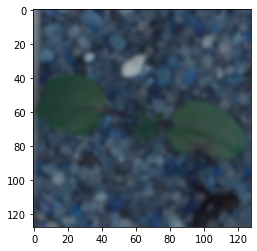

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x_test[33].reshape(128, 128, 3), cmap='gray')
y_pred = model.predict(x_test[33].reshape(1, 128, 128, 3))
print("Predicted label:", y_pred.argmax())
#Based on the predicted label number -
print("Predicted label: Scentless Mayweed")
print("Softmax Outputs:", y_pred)
print(y_pred.sum())

Predicted label: 9
Predicted label: Shepherds Purse
Softmax Outputs: [[1.7341398e-06 2.5855223e-04 1.0584563e-04 5.6220923e-02 7.4744921e-09
  7.0207381e-05 5.3437558e-05 8.7153840e-06 5.3953221e-03 9.3504173e-01
  2.8272148e-03 1.6316320e-05]]
1.0


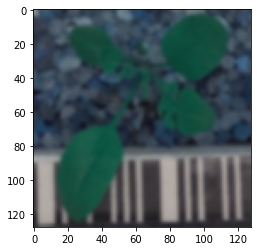

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x_test[36].reshape(128, 128, 3), cmap='gray')
y_pred = model.predict(x_test[36].reshape(1, 128, 128, 3))
print("Predicted label:", y_pred.argmax())
#Based on the predicted label number -
print("Predicted label: Shepherds Purse")
print("Softmax Outputs:", y_pred)
print(y_pred.sum())

Predicted label: 1
Predicted label: Common Chickweed
Softmax Outputs: [[3.39544436e-04 4.70962763e-01 4.42825258e-01 9.60129662e-04
  4.63773273e-02 1.14108315e-02 4.90728926e-05 3.28194292e-04
  2.32553016e-03 1.58666866e-03 1.76497712e-03 2.10697781e-02]]
1.0000001


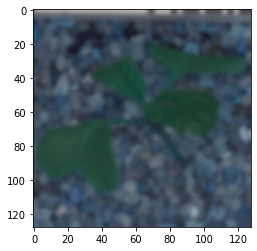

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x_test[59].reshape(128, 128, 3), cmap='gray')  
y_pred = model.predict(x_test[59].reshape(1, 128, 128, 3))
print("Predicted label:", y_pred.argmax())
#Based on the predicted label number -
print("Predicted label: Common Chickweed")
print("Softmax Outputs:", y_pred)
print(y_pred.sum())

**Conclusion**

The model can with high accuracy classify the species of plant based on photos.